In [14]:
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
from qiskit import Aer

In [2]:
# Crear un circuito con ambas entradas, X y Y
input_qubits = 4 # Estas variables estan asociadas a X
ancilla_qubit = 1 # Esta variable esta asociada a Y
total_qubits = input_qubits+ancilla_qubit # Numero total de cubits en el circuito

In [3]:
qc = QuantumCircuit(total_qubits, input_qubits) # Unicamente creamos un numero de variables clasicas igual al numero de cubits en X

In [4]:
# Los cubits en X se ponen en superposicion
for idx in range(input_qubits):
    qc.h(idx)

In [5]:
# El cubit y ahora debe de estar en el estado 1 y despues le aplicamos la compuerta de Hadamard
qc.x(input_qubits)
qc.h(input_qubits)
qc.barrier()
qc.draw()

┌───┐      ░ 
q_0: ┤ H ├──────░─
     ├───┤      ░ 
q_1: ┤ H ├──────░─
     ├───┤      ░ 
q_2: ┤ H ├──────░─
     ├───┤      ░ 
q_3: ┤ H ├──────░─
     ├───┤┌───┐ ░ 
q_4: ┤ X ├┤ H ├─░─
     └───┘└───┘ ░ 
c: 4/═════════════

In [6]:
# Crear el bit 1010
qc.i(0)
qc.x(1)
qc.i(2)
qc.x(3)
qc.barrier()
qc.draw()

┌───┐      ░ ┌───┐ ░ 
q_0: ┤ H ├──────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░ 
q_1: ┤ H ├──────░─┤ X ├─░─
     ├───┤      ░ ├───┤ ░ 
q_2: ┤ H ├──────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░ 
q_3: ┤ H ├──────░─┤ X ├─░─
     ├───┤┌───┐ ░ └───┘ ░ 
q_4: ┤ X ├┤ H ├─░───────░─
     └───┘└───┘ ░       ░ 
c: 4/═════════════════════

In [7]:
# Crear el oraculo cuantico correspondiente a una funcion balanceada

for idx in range(input_qubits):
    qc.cx(idx, input_qubits)
qc.barrier()
qc.draw()

┌───┐      ░ ┌───┐ ░                      ░ 
q_0: ┤ H ├──────░─┤ I ├─░───■──────────────────░─
     ├───┤      ░ ├───┤ ░   │                  ░ 
q_1: ┤ H ├──────░─┤ X ├─░───┼────■─────────────░─
     ├───┤      ░ ├───┤ ░   │    │             ░ 
q_2: ┤ H ├──────░─┤ I ├─░───┼────┼────■────────░─
     ├───┤      ░ ├───┤ ░   │    │    │        ░ 
q_3: ┤ H ├──────░─┤ X ├─░───┼────┼────┼────■───░─
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘└───┘ ░ 
c: 4/════════════════════════════════════════════

In [8]:
qc.i(0)
qc.x(1)
qc.i(2)
qc.x(3)
qc.barrier()
qc.draw()

┌───┐      ░ ┌───┐ ░                      ░ ┌───┐ ░ 
q_0: ┤ H ├──────░─┤ I ├─░───■──────────────────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░   │                  ░ ├───┤ ░ 
q_1: ┤ H ├──────░─┤ X ├─░───┼────■─────────────░─┤ X ├─░─
     ├───┤      ░ ├───┤ ░   │    │             ░ ├───┤ ░ 
q_2: ┤ H ├──────░─┤ I ├─░───┼────┼────■────────░─┤ I ├─░─
     ├───┤      ░ ├───┤ ░   │    │    │        ░ ├───┤ ░ 
q_3: ┤ H ├──────░─┤ X ├─░───┼────┼────┼────■───░─┤ X ├─░─
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ 
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘└───┘ ░       ░ 
c: 4/════════════════════════════════════════════════════

In [9]:
# Aplicar las compuertas de Hadamard de nuevo
for idx in range(4):
    qc.h(idx)
qc.barrier()
qc.draw()

┌───┐      ░ ┌───┐ ░                      ░ ┌───┐ ░ ┌───┐ ░ 
q_0: ┤ H ├──────░─┤ I ├─░───■──────────────────░─┤ I ├─░─┤ H ├─░─
     ├───┤      ░ ├───┤ ░   │                  ░ ├───┤ ░ ├───┤ ░ 
q_1: ┤ H ├──────░─┤ X ├─░───┼────■─────────────░─┤ X ├─░─┤ H ├─░─
     ├───┤      ░ ├───┤ ░   │    │             ░ ├───┤ ░ ├───┤ ░ 
q_2: ┤ H ├──────░─┤ I ├─░───┼────┼────■────────░─┤ I ├─░─┤ H ├─░─
     ├───┤      ░ ├───┤ ░   │    │    │        ░ ├───┤ ░ ├───┤ ░ 
q_3: ┤ H ├──────░─┤ X ├─░───┼────┼────┼────■───░─┤ X ├─░─┤ H ├─░─
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ └───┘ ░ 
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░───────░─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘└───┘ ░       ░       ░ 
c: 4/════════════════════════════════════════════════════════════

In [10]:
# Aplicar los operadores de medicion
qc.measure(range(4), range(4))
qc.draw()

┌───┐      ░ ┌───┐ ░                      ░ ┌───┐ ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├──────░─┤ I ├─░───■──────────────────░─┤ I ├─░─┤ H ├─░─┤M├─────────
     ├───┤      ░ ├───┤ ░   │                  ░ ├───┤ ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░─┤ X ├─░───┼────■─────────────░─┤ X ├─░─┤ H ├─░──╫─┤M├──────
     ├───┤      ░ ├───┤ ░   │    │             ░ ├───┤ ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──────░─┤ I ├─░───┼────┼────■────────░─┤ I ├─░─┤ H ├─░──╫──╫─┤M├───
     ├───┤      ░ ├───┤ ░   │    │    │        ░ ├───┤ ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░─┤ X ├─░───┼────┼────┼────■───░─┤ X ├─░─┤ H ├─░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░───────░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░───────░──╫──╫──╫──╫─
     └───┘└───┘ ░       ░ └───┘└───┘└───┘└───┘ ░       ░       ░  ║  ║  ║  ║ 
c: 4/═════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                  0  1  2  3

In [15]:
# Ejecutar el circuito en el simulador
backend = Aer.get_backend('qasm_simulator')

In [16]:
result = execute(qc, backend=backend, shots=1024).result()

In [17]:
counts = result.get_counts(qc)

In [18]:
print(counts)

{'1111': 1024}


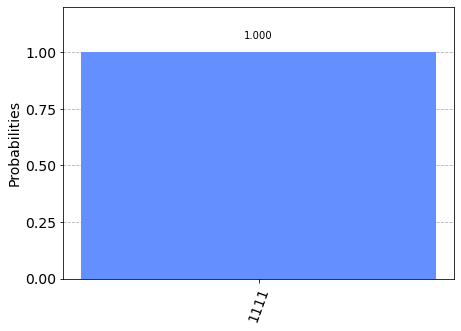

In [20]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere

plot_histogram(counts)

In [21]:
# Job watcher widget
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [23]:
provider = IBMQ.load_account()

RequestsApiError: "HTTPSConnectionPool(host='auth.quantum-computing.ibm.com', port=443): Max retries exceeded with url: /api/version (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1125)')))"

In [22]:
provider.backends(filters=lambda x: x.configuration().n_qubits>=total_qubits and not x.configuration().simulator and x.status().operational==True)

NameError: name 'provider' is not defined

In [26]:
backend = Aer.get_backend('ibmq_ourense')

QiskitBackendNotFoundError: 'No backend matches the criteria'